## Plotting fluxes and rates, January 2017 (Sikuliaq)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# read the data into pandas dataframes
etnp_2017 = pd.read_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/flux/2017-fluxes2.csv")

etnp_2017.head()

,sample id,Year,Station,Depth,Flux (mg/m2/day),C flux organic,Trap type,CN total,CN organic,Protein flux (ug/m2/day),Protein/org C of flux (ug protein/umol C)
0,1-1_60m_+p,2017,P1,60,88.651326,NaN,cone,NaN,NaN,NaN,NaN
1,2-2_50m_ctl,2017,P1,50,NaN,NaN,cone,NaN,NaN,NaN,NaN
2,2-2_50m_+p,2017,P1,50,190.876791,NaN,cone,NaN,NaN,329.466919,NaN
3,2-2_50m_top,2017,P1,50,NaN,NaN,cone,NaN,NaN,NaN,NaN
4,2-2_320m_netwash,2017,P1,320,NaN,NaN,net,10.318678,9.380886,NaN,NaN


In [3]:
# keep only the rows Station = P2
# keep only rows Station P1

P2_2017 = etnp_2017.loc[(etnp_2017['Station'] == 'P2')]
P1_2017 = etnp_2017.loc[(etnp_2017['Station'] == 'P1')]

P2_2017.head()

,sample id,Year,Station,Depth,Flux (mg/m2/day),C flux organic,Trap type,CN total,CN organic,Protein flux (ug/m2/day),Protein/org C of flux (ug protein/umol C)
67,1-12_73m_ctl,2017,P2,73,NaN,NaN,cone,38.988781,34.774591,NaN,NaN
68,1-12_73m_+p,2017,P2,73,81.787511,103.064253,cone,24.021420,18.178697,NaN,NaN
69,1-12_148m_ctl,2017,P2,148,NaN,NaN,cone,83.527317,48.425718,NaN,NaN
70,1-12_148m_+p,2017,P2,148,90.820391,66.997775,cone,25.859061,19.770272,NaN,NaN
71,2-14_100m_ctl,2017,P2,100,NaN,NaN,cone,NaN,NaN,NaN,NaN


In [26]:
import io
import requests
from pathlib import Path
import seaborn as sns

In [28]:
import ctd


cast = ctd.from_cnv("/home/millieginty/Documents/git-repos/2017-etnp/notebooks/python-ctd/skq201617s-030avg.cnv")
down, up = cast.split()

down.head()

,depSMignore,latitude,longitude,t090C,t190C,potemp090C,sal00,sal11,density00,sigma-t00,...,oxsolMm/Kg,CStarAt0,CStarTr0,v2,v3,ph,par,scan,nbin,flag
Pressure [dbar],,,,,,,,,,,,,,,,,,,,,
3.0,2.982,20.30536,-106.21944,26.1551,26.1540,26.1544,34.6634,34.6735,1022.7439,22.7310,...,203.28815,0.1769,95.6729,1.4176,2.2625,-2.040,1.000000e-12,-599.0,74.0,False
4.0,3.975,20.30536,-106.21944,26.1509,26.1514,26.1500,34.6637,34.6739,1022.7498,22.7326,...,203.30163,0.1762,95.6894,1.4176,2.2628,-2.038,1.000000e-12,1553.0,580.0,False
5.0,4.969,20.30536,-106.21944,26.1547,26.1549,26.1535,34.6636,34.6738,1022.7529,22.7313,...,203.28918,0.1757,95.7028,1.4177,2.2630,-2.038,1.000000e-12,1503.0,162.0,False
6.0,5.963,20.30536,-106.21944,26.1518,26.1508,26.1505,34.6635,34.6742,1022.7579,22.7321,...,203.29888,0.1738,95.7487,1.4178,2.2630,-2.038,1.000000e-12,1657.0,119.0,False
7.0,6.957,20.30536,-106.21944,26.1519,26.1492,26.1503,34.6639,34.6743,1022.7626,22.7324,...,203.29810,0.1766,95.6814,1.4177,2.2629,-2.038,1.000000e-12,1749.0,134.0,False


In [30]:
def make_patch_spines_invisible(ax):
    
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

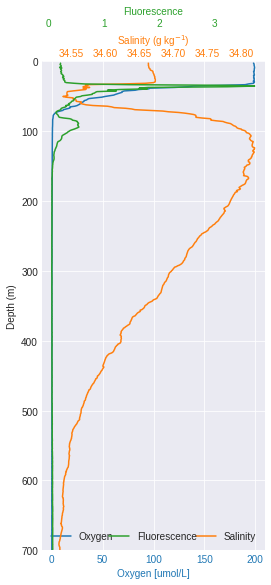

In [33]:
# depth plot but zoomed on upper oxycline

%matplotlib inline

from matplotlib import style

style.use("seaborn-darkgrid")

fig, ax0 = plt.subplots(figsize=(4, 9))

colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]

ax0.invert_yaxis()
ax1 = ax0.twiny()
ax2 = ax0.twiny()

(l0,) = ax0.plot(cast["sbox0Mm/Kg"], cast["depSMignore"], color=colors[0], label="Oxygen")
ax0.set_xlabel("Oxygen [umol/L]")

ax0.set_ylabel('Depth (m)')
ax0.set_ylim([700,0])

(l1,) = ax1.plot(cast["sal00"], cast["depSMignore"], color=colors[1], label="Salinity")
ax1.set_xlabel("Salinity (g kg$^{-1}$)")

(l2,) = ax2.plot(
    cast["flSP"], cast["depSMignore"], color=colors[2], label="Fluorescence")
ax2.set_xlabel("Fluorescence")

make_patch_spines_invisible(ax2)
ax2.spines["top"].set_position(("axes", 1.06))
ax2.spines["top"].set_visible(True)

ax0.xaxis.label.set_color(l0.get_color())
ax1.xaxis.label.set_color(l1.get_color())
ax2.xaxis.label.set_color(l2.get_color())

ax0.tick_params(axis="x", colors=l0.get_color())
ax1.tick_params(axis="x", colors=l1.get_color())
ax2.tick_params(axis="x", colors=l2.get_color())

ax0.grid(True)
ax1.grid(False)
ax2.grid(False)

ax0.legend(loc="lower left")
ax1.legend(loc="lower right")
ax2.legend(loc="lower center");

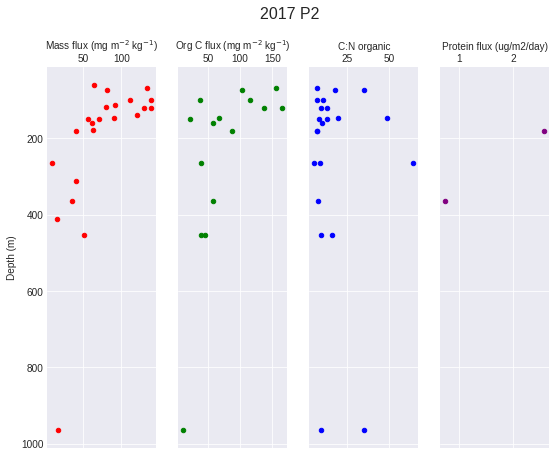

In [24]:
# Three-panel plot

from matplotlib import style
style.use("seaborn-darkgrid")

fig2, (ax2, ax3, ax4, ax5) = plt.subplots(1,4,sharey=True, figsize=(9, 7))

fig2.suptitle('2017 P2', fontsize=16, y = 1.0)

# Mass flux

P2_2017.plot(ax = ax2, kind='scatter', x='Flux (mg/m2/day)', y='Depth', c='Red')
#ax2.plot(temp,depth,'o-')
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax2.set_xlabel('Mass flux (mg m$^{-2}$ kg$^{-1}$)')
ax2.xaxis.set_label_position('top') # this moves the label to the top
ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax2.grid(True)

# Organic carbon flux

P2_2017.plot(ax = ax3, kind='scatter', x='C flux organic', y='Depth', c='Green')
#ax3.plot(salt,depth,'o-r')
ax3.set_xlabel('Org C flux (mg m$^{-2}$ kg$^{-1}$)')
ax3.xaxis.set_label_position('top') # this moves the label to the top
ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax3.yaxis.set_visible(False) # This erases the y ticks
ax3.grid(True)

# CN of organic matter

P2_2017.plot(ax = ax4, kind='scatter', x='CN organic', y='Depth', c='Blue')
#ax4.plot(fluo,depth,'o-g')
ax4.set_xlabel('C:N organic')
ax4.xaxis.set_label_position('top') # this moves the label to the top
ax4.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax4.yaxis.set_visible(False) # This erases the y ticks
ax4.grid(True)

# Protein flux

P2_2017.plot(ax = ax5, kind='scatter', x='Protein/org C of flux (ug protein/umol C)', y='Depth', c='Purple')
#ax4.plot(fluo,depth,'o-g')
ax5.set_xlabel('Protein flux (ug/m2/day)')
ax5.xaxis.set_label_position('top') # this moves the label to the top
ax5.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax5.yaxis.set_visible(False) # This erases the y ticks
ax5.grid(True)

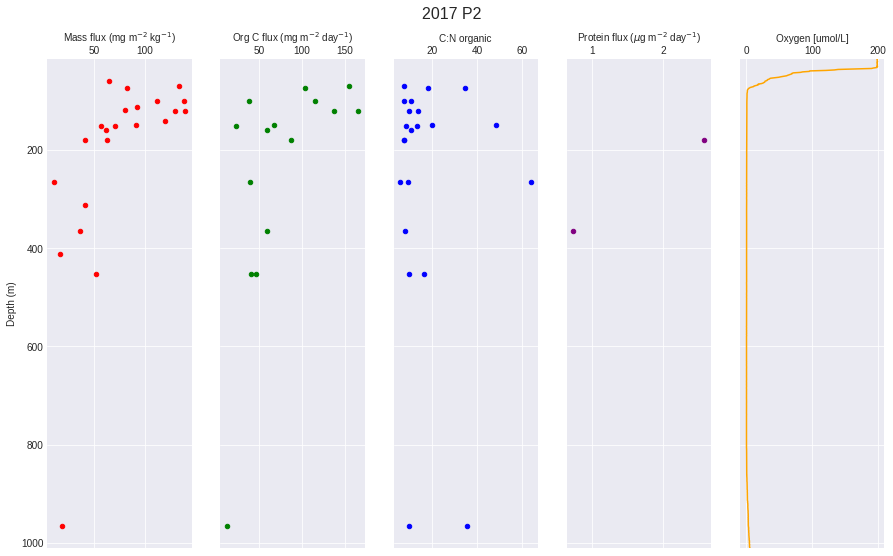

In [54]:
# Five-panel plot

from matplotlib import style
style.use("seaborn-darkgrid")

fig2, (ax2, ax3, ax4, ax5, ax6) = plt.subplots(1,5,sharey=True, figsize=(15,9))

fig2.suptitle('2017 P2', fontsize=16, y = 0.96)

# Mass flux

P2_2017.plot(ax = ax2, kind='scatter', x='Flux (mg/m2/day)', y='Depth', c='Red')
#ax2.plot(temp,depth,'o-')
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax2.set_xlabel('Mass flux (mg m$^{-2}$ kg$^{-1}$)')
ax2.xaxis.set_label_position('top') # this moves the label to the top
ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax2.grid(True)

# Organic carbon flux

P2_2017.plot(ax = ax3, kind='scatter', x='C flux organic', y='Depth', c='Green')
#ax3.plot(salt,depth,'o-r')
ax3.set_xlabel('Org C flux (mg m$^{-2}$ day$^{-1}$)') 
ax3.xaxis.set_label_position('top') # this moves the label to the top
ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax3.yaxis.set_visible(False) # This erases the y ticks
ax3.grid(True)

# CN of organic matter

P2_2017.plot(ax = ax4, kind='scatter', x='CN organic', y='Depth', c='Blue')
#ax4.plot(fluo,depth,'o-g')
ax4.set_xlabel('C:N organic')
ax4.xaxis.set_label_position('top') # this moves the label to the top
ax4.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax4.yaxis.set_visible(False) # This erases the y ticks
ax4.grid(True)

# Protein flux

P2_2017.plot(ax = ax5, kind='scatter', x='Protein/org C of flux (ug protein/umol C)', y='Depth', c='Purple')
#ax4.plot(fluo,depth,'o-g')
ax5.set_xlabel('Protein flux ($\mu$g m$^{-2}$ day$^{-1}$)') 
ax5.xaxis.set_label_position('top') # this moves the label to the top
ax5.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax5.yaxis.set_visible(False) # This erases the y ticks
ax5.grid(True)

# Chem profiles

cast.plot(ax = ax6, kind='line', x='sbox0Mm/Kg', y='depSMignore', c='Orange')
ax6.set_xlabel('Oxygen [umol/L]')
ax6.xaxis.set_label_position('top') # this moves the label to the top
ax6.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax6.get_legend().remove()
ax6.grid(True)

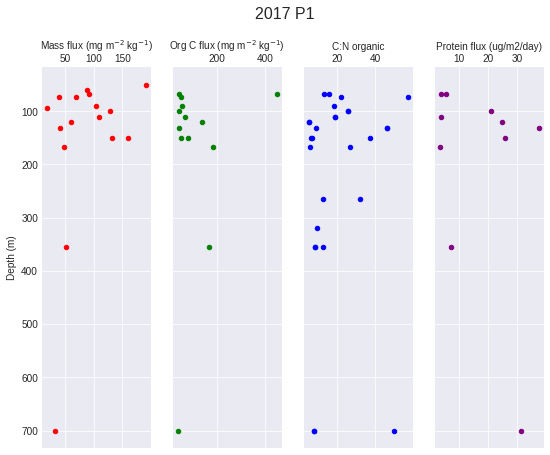

In [25]:
# Three-panel plot

from matplotlib import style
style.use("seaborn-darkgrid")

fig2, (ax2, ax3, ax4, ax5) = plt.subplots(1,4,sharey=True, figsize=(9, 7))

fig2.suptitle('2017 P1', fontsize=16, y = 1.0)

# Mass flux

P1_2017.plot(ax = ax2, kind='scatter', x='Flux (mg/m2/day)', y='Depth', c='Red')
#ax2.plot(temp,depth,'o-')
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax2.set_xlabel('Mass flux (mg m$^{-2}$ kg$^{-1}$)')
ax2.xaxis.set_label_position('top') # this moves the label to the top
ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax2.grid(True)

# Organic carbon flux

P1_2017.plot(ax = ax3, kind='scatter', x='C flux organic', y='Depth', c='Green')
#ax3.plot(salt,depth,'o-r')
ax3.set_xlabel('Org C flux (mg m$^{-2}$ kg$^{-1}$)')
ax3.xaxis.set_label_position('top') # this moves the label to the top
ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax3.yaxis.set_visible(False) # This erases the y ticks
ax3.grid(True)

# CN of organic matter

P1_2017.plot(ax = ax4, kind='scatter', x='CN organic', y='Depth', c='Blue')
#ax4.plot(fluo,depth,'o-g')
ax4.set_xlabel('C:N organic')
ax4.xaxis.set_label_position('top') # this moves the label to the top
ax4.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax4.yaxis.set_visible(False) # This erases the y ticks
ax4.grid(True)

# Protein flux

P1_2017.plot(ax = ax5, kind='scatter', x='Protein/org C of flux (ug protein/umol C)', y='Depth', c='Purple')
#ax4.plot(fluo,depth,'o-g')
ax5.set_xlabel('Protein flux (ug/m2/day)')
ax5.xaxis.set_label_position('top') # this moves the label to the top
ax5.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax5.yaxis.set_visible(False) # This erases the y ticks
ax5.grid(True)